# Feature Selection

The purpose of this notebook is to:
* Select relevant features
* Reduce dimensionality for some sets of features
* Study correlations in preparation for model testing

In [4]:
import numpy as np
import pandas as pd

from os.path import join

pd.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
parcel = pd.read_pickle(join('../shared_data', 'parcel.pkl'))

In [5]:
parcel.head()

,Major,Minor,PropType,Area,DistrictName,ParcSqFtLot,CurrentZoning,Topography,StreetSurface,InadequateParking,PcntUnusable,MtRainier,Olympics,Cascades,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,LotDepthFactor,TrafficNoise,AirportNoise,PowerLines,HistoricSite,SteepSlopeHazard,WaterProblems,SqFtTotLiving,no_stories,bath_count,bedroom_count,year_built,year_renovated,heat_system,brick_stone,sq_ft_upper_floor,sale_date,sale_price,sale_reason,appr_land_val,appr_imprv_val,appr_tot_val,appr_date,major_str,minor_str,addr_full,landmarks_counts100,landmarks_counts1000,landmarks_counts20000,light_rail_counts100,light_rail_counts1000,light_rail_counts20000,parks_counts100,parks_counts1000,parks_counts20000,priv_school_counts100,priv_school_counts1000,priv_school_counts20000,pub_school_counts100,pub_school_counts1000,pub_school_counts20000
pin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8121100155,812110,155,R,81.0,SEATTLE,2868,SF 5000,1,1,2,0,0,0,0,0,0,0,0,0,0,0,N,0,N,N,2700,2.0,3,4,2006,0,6,0,0,2007-04-18,0,10,124000,771000,895000,2016-09-19,812110,0155,3844 37TH AVE S,0,0,145,0,0,10,0,0,115,0,0,25,0,0,33
3630150210,363015,210,R,75.0,ISSAQUAH,1560,UV,0,1,2,0,0,0,0,0,0,0,0,0,0,0,N,0,N,N,1320,2.0,2,3,2006,0,5,0,0,2004-12-07,2760000,1,282000,191000,473000,2016-08-23,363015,0210,1927 NE KENSINGTON CT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2113700355,211370,355,R,77.0,SEATTLE,4240,SF 5000,1,1,0,0,0,2,0,0,0,0,0,0,0,0,N,0,N,N,1480,1.0,2,3,1986,0,4,0,0,2016-06-01,0,8,110000,241000,351000,2016-09-07,211370,0355,7941 14TH AVE SW,0,0,29,0,0,4,0,0,58,0,0,18,0,0,33
4036100060,403610,60,R,64.0,BELLEVUE,9488,R-5,0,1,2,0,0,0,0,0,0,0,0,0,0,0,N,0,N,N,2530,1.0,1,5,1966,0,5,0,0,2016-05-16,710000,1,318000,255000,573000,2016-08-23,403610,0060,11630 SE 47TH PL,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1257202360,125720,2360,R,43.0,SEATTLE,3060,SF 5000,0,1,2,0,0,0,0,0,0,0,0,0,0,0,N,0,N,N,1680,1.5,2,2,1902,0,5,0,0,2002-09-12,0,13,298000,523000,821000,2016-06-22,125720,2360,2139 N 63RD ST,0,0,179,0,0,0,0,0,151,0,0,44,0,0,59


In [14]:
# Creating various filters

is_recent_sale = (parcel.sale_date.dt.year >=2014)
is_under_3 = (parcel.sale_price <= 3000000)

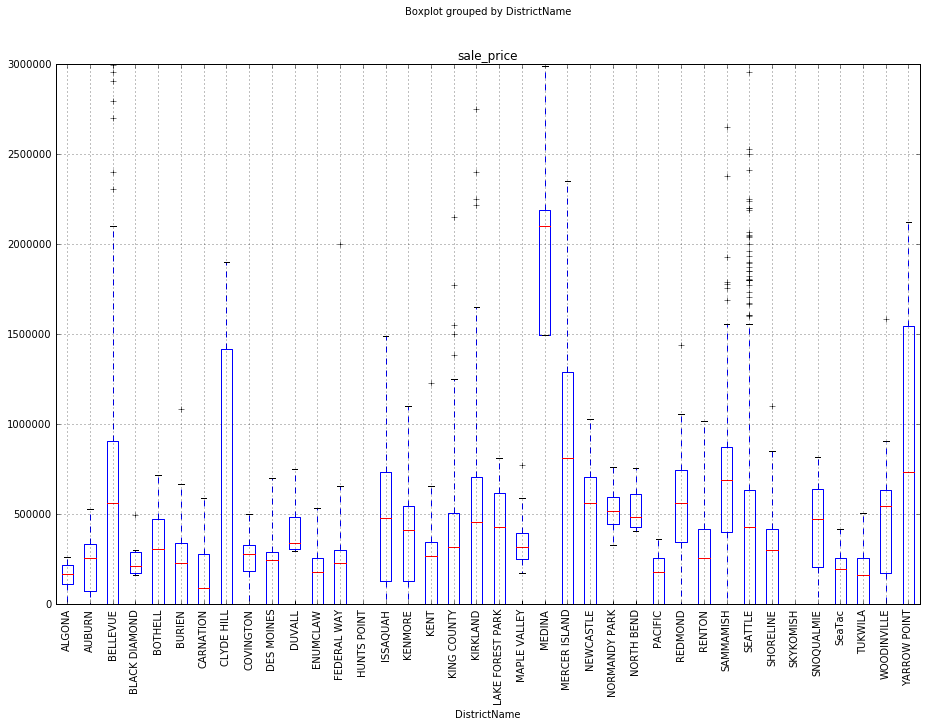

In [16]:
# DistrictName

parcel[is_recent_sale & is_under_3].boxplot(column='sale_price', by='DistrictName', figsize=(15,10), rot=90)

# District has some effect on sales price. Specifically Medina is super pricey (where bill gates lives).

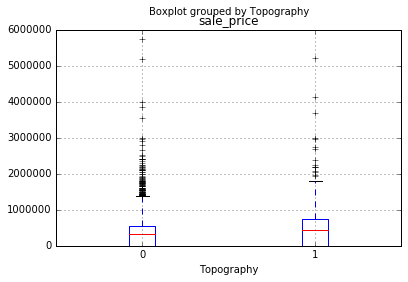

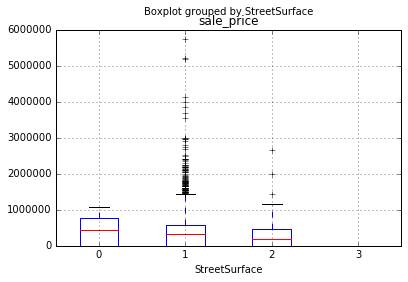

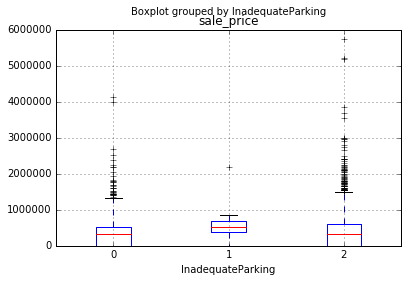

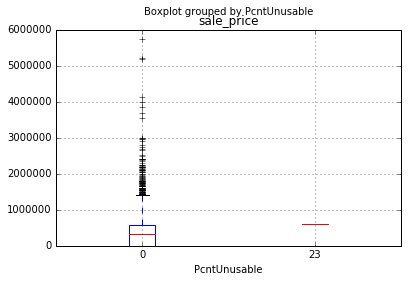

In [18]:
land_features = ['Topography', 'StreetSurface', 'InadequateParking', 'PcntUnusable']

for feature in land_features:
    parcel[is_recent_sale].boxplot(column='sale_price', by=feature)
    
# These all seem useless. Definitely exclude

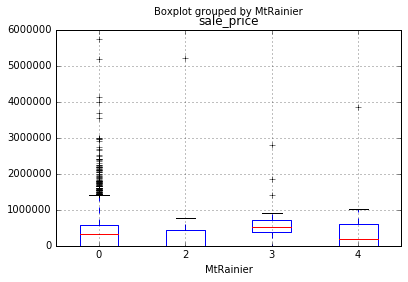

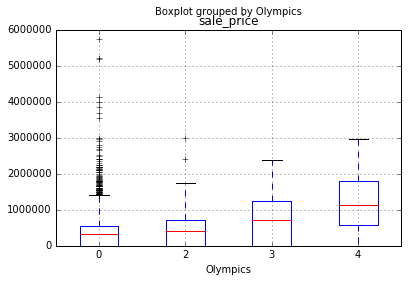

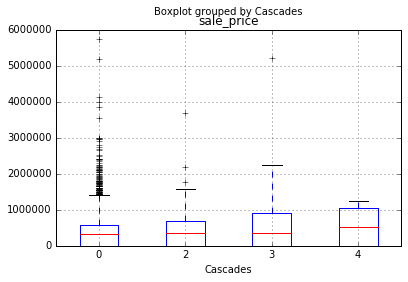

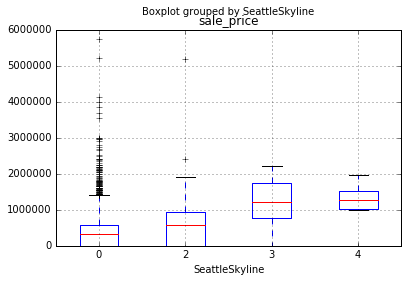

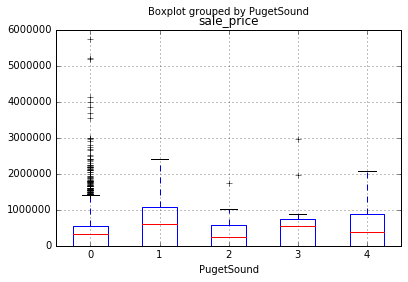

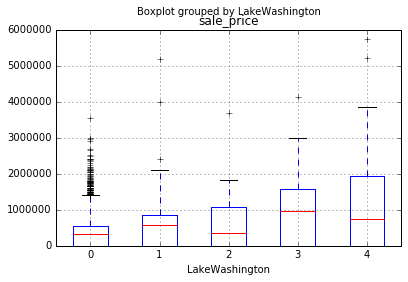

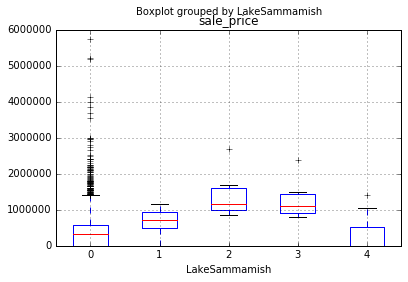

In [20]:
view_features = [
    'MtRainier', 'Olympics', 'Cascades', 'SeattleSkyline',
    'PugetSound', 'LakeWashington', 'LakeSammamish'
]

for feature in view_features:
    parcel[is_recent_sale].boxplot(column='sale_price', by=feature)

# Some of the view features seem like they may be useful

In [19]:
parcel.columns

Index(['Major', 'Minor', 'PropType', 'Area', 'DistrictName', 'ParcSqFtLot',
       'CurrentZoning', 'Topography', 'StreetSurface', 'InadequateParking',
       'PcntUnusable', 'MtRainier', 'Olympics', 'Cascades', 'SeattleSkyline',
       'PugetSound', 'LakeWashington', 'LakeSammamish', 'LotDepthFactor',
       'TrafficNoise', 'AirportNoise', 'PowerLines', 'HistoricSite',
       'SteepSlopeHazard', 'WaterProblems', 'SqFtTotLiving', 'no_stories',
       'bath_count', 'bedroom_count', 'year_built', 'year_renovated',
       'heat_system', 'brick_stone', 'sq_ft_upper_floor', 'sale_date',
       'sale_price', 'sale_reason', 'appr_land_val', 'appr_imprv_val',
       'appr_tot_val', 'appr_date', 'major_str', 'minor_str', 'addr_full',
       'landmarks_counts100', 'landmarks_counts1000', 'landmarks_counts20000',
       'light_rail_counts100', 'light_rail_counts1000',
       'light_rail_counts20000', 'parks_counts100', 'parks_counts1000',
       'parks_counts20000', 'priv_school_counts100', 'priv